## Tensorflow Neural Networks (Regression Part # 02):

Let's code along some more realistic Tensorflow __Regression__ example, and we'll also introduce Tensorflow's __tf.estimate__ API, which is a much simpler API for models like __Regression__ and __Classification__.

We already have a lot of Machine Learning algorithms that can perform __Regression__ and __Classification__ tasks very well. But, the purpose of Tensorflow really is to try to solve problems that typical Machine Learning algorithms can't solve e.g __image classification__.

Later on, we'll see how to use Tensorflow for things like __word embeddings__ or even using __Recurrent Neural Networks__ for time-series analysis. Those are the problems that are really hard to solve without the use of __Deep Neural Network__ or __Specialized Neural Networks__ using Tensorflow.

Simple example like typical __Regression__ and __Classfication__ tasks are pretty easy to solve, well! depending on our dataset with other Machine Learning algorithms, and because Tensorflow has a nice __estimator API__ that's going to make our lives a lot easier, if we decide to use Tensorflow for some of these more basic supervised learning problems.

So, Let's to ahead and see how we can perform more realistic __Regression__ tasks with Tensorflow..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
# Creating data set with noise added! 

x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

print(x_data)
print('\n')
print(noise)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


[1.26503638 0.0517093  0.40479361 ... 0.36111273 0.21614667 0.143448  ]


#### Equation:

y = mx + b

b = 5

In [3]:
# Original 'y', later on we'll figure out using Neural Network whick is '0.5' for now
# And to make it a little harder for our model, we'll add some noise in it

y_true = (0.5 * x_data) + 5 + noise

In [4]:
# Creating data frame off of our generated data

x_df = pd.DataFrame(data = x_data, columns = ['X Data'])
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [5]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [6]:
y_df.head()

,Y
0,6.265036
1,5.051714
2,5.404804
3,4.560601
4,5.344084


In [7]:
# Final data frame

final_data = pd.concat([x_df, y_df], axis = 1)

In [8]:
final_data.head()

,X Data,Y
0,0.00000,6.265036
1,0.00001,5.051714
2,0.00002,5.404804
3,0.00003,4.560601
4,0.00004,5.344084


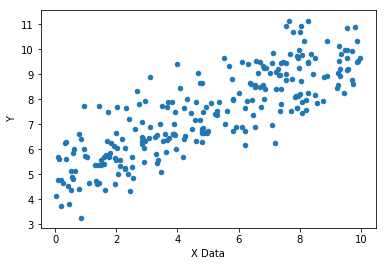

In [9]:
# Grabbing the random samples of our data
# We can plot n_samples of our choice easily rather than whole data set

final_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

## Regression with Tensorflow:

Now let's go ahead and create a linear fit on above dataset using Tensorflow. Keep in mind a _million_ points is a huge dataset to pass in at once. And a lot of times, when we are dealing with _Deep learning_, we have a humongous dataset, cuz the more data we have, the better usually for training a lot of these complex models.

But, we can't just feed in a _million_ data observations into a __Neural Network__ at once. What we do instead we create __batches__ of data. We feed in thes __batches__ of the data for training batch by batch.

Let's go ahead and see how we do that!

In [10]:
np.random.randn(2)

array([-0.39486592,  0.27685718])

In [11]:
batch_size = 8

# randomly initilize the weights (slope) and biases(intercept)

m = tf.Variable(0.95)
b = tf.Variable(1.10)

In [12]:
# Creating Placeholders

x_placeholder = tf.placeholder(tf.float32, [batch_size])
y_placeholder = tf.placeholder(tf.float32, [batch_size])

In [13]:
# Defining Graphs (Actual Operations)

y_model = (m * x_placeholder) + b

In [14]:
# Defining Error (Cost Function)

error = tf.reduce_sum(tf.square(y_placeholder - y_model))

In [15]:
# Defining the Gradient Descent optimizer

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [16]:
# Initializing the Variables globally

init = tf.global_variables_initializer()

In [17]:
# Running the Session

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000 # No of batches we wanna go through
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        feed = {x_placeholder: x_data[rand_ind], y_placeholder: y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m, b])
    

__Remember!__ we have set the actual slope as 0.5 in __'y_true' -> y_true = (0.5 * x_data) + 5 + noise__.
And now when we are predicting the model_m i.e slope of our prediction, it should be closer to 0.5, and same for the baise, it should be closer to 5 for better accuracy.
Let's see what's the predicted value of our slope!

In [18]:
model_m

0.40142497

In [19]:
model_b

4.9239726

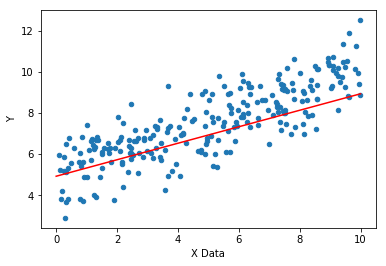

In [20]:
# Plottig
y_hat = x_data * model_m + model_b

final_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')

## Conclusion:

Consequently, once you have your data, you can do the following steps:

* Create the Variables
* Create the Placeholders
* Define the Operations in your Graph
* Define some sort of Error or Lost function
* Set up the Optimizer
* Set up the Trainer
* Initialize those global variables created earlier
* And finally if you have a huge dataset, you also want to feed the data in batches, that are basically random batches from your large dataset. And a lot of times it's the hard part, that how to actually grab the data. It's sometimes challenging to work on a new dataset and feed the data in batches to the Model.

## Tensorflow Estimator:

Let's now see how we can perform a __Regression__ task with the Tensorflow __estimator API__. There are lots of other higher level __API's__ such as __Keras__ and __Layers__ etc, we'll cover those later in Miscellaneous section. The __tf.estimator API__ has several model types to choose from. Let's go ahead and see the various options:

Here are few of the __estimator__ types:
* tf.estimator.LinearClassifier -> constructs a linear __Classification__ model
* tf.estimator.LinearRegressor -> contructs a linear __Regression__ model
* tf.estimator.DNNRegressor -> contructs a __Neural Network Regression__ model
* tf.estimator.DNNClassifier -> contructs a __Neural Network Classification__ model

In general, to use the __estimator API__ we do the following things:
* Define a list of __feature columns__
* Create the **estimator** model
* Create a Data Input function
* Call Train, Evaluate and Predict methods on the __estimator__ object

So, LET'S GO AHEAD AND JUMP RIGHT IN..

In [21]:
# Feature columns

feat_cols = [tf.feature_column.numeric_column('x', shape = [1])]

In [22]:
# Estimator

estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

W0821 13:40:41.633229 140622696314688 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp1x5b49ej


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [25]:
print(x_train.shape)
print(x_eval.shape)
print(y_train.shape)
print(y_eval.shape)

(700000,)
(300000,)
(700000,)
(300000,)


In [26]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8,
                                            num_epochs = None, shuffle = True)

In [27]:
# Train input function

train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8,
                                            num_epochs = 1000, shuffle = False)

In [28]:
# Evaluate input function

eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size = 8,
                                            num_epochs = 1000, shuffle = False)

In [29]:
estimator.train(input_fn = input_func, steps = 1000)

W0821 13:40:42.209338 140622696314688 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0821 13:40:42.223475 140622696314688 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0821 13:40:42.225893 140622696314688 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator

In [30]:
# Training Metrics

train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

W0821 13:40:44.656532 140622696314688 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [31]:
print(train_metrics)

{'average_loss': 1.091752, 'label/mean': 7.5113926, 'loss': 8.734016, 'prediction/mean': 7.387652, 'global_step': 1000}


In [32]:
# Testing Metrics

eval_metrics = estimator.evaluate(input_fn = eval_input_func, steps = 1000)

In [33]:
# Calculating the Loss from Train and Evaluate metrics

print('TRAINING DATA METRICS:')
print(train_metrics)
print('\n')
print('EVALUATION DATA METRICS:')
print(eval_metrics)

# A good sign that we're not over fitting or underfitting our model is to get the values of training and 
# evaluation loss as close as possible!

# Let's see what we get!

TRAINING DATA METRICS:
{'average_loss': 1.091752, 'label/mean': 7.5113926, 'loss': 8.734016, 'prediction/mean': 7.387652, 'global_step': 1000}


EVALUATION DATA METRICS:
{'average_loss': 1.0882759, 'label/mean': 7.472599, 'loss': 8.706207, 'prediction/mean': 7.366105, 'global_step': 1000}


In [34]:
# Predicted Values:

brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data},
                                                   shuffle = False)

In [46]:
estimator.predict(input_fn = input_fn_predict)

<generator object Estimator.predict at 0x7fe4b99dc840>

In [48]:
list(estimator.predict(input_fn = input_fn_predict))

[{'predictions': array([4.403794], dtype=float32)},
 {'predictions': array([5.066577], dtype=float32)},
 {'predictions': array([5.72936], dtype=float32)},
 {'predictions': array([6.392143], dtype=float32)},
 {'predictions': array([7.054926], dtype=float32)},
 {'predictions': array([7.717709], dtype=float32)},
 {'predictions': array([8.380492], dtype=float32)},
 {'predictions': array([9.043276], dtype=float32)},
 {'predictions': array([9.7060585], dtype=float32)},
 {'predictions': array([10.368841], dtype=float32)}]

In [52]:
# Plotting Predictions

predictions = []

for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

In [53]:
predictions

[array([4.403794], dtype=float32),
 array([5.066577], dtype=float32),
 array([5.72936], dtype=float32),
 array([6.392143], dtype=float32),
 array([7.054926], dtype=float32),
 array([7.717709], dtype=float32),
 array([8.380492], dtype=float32),
 array([9.043276], dtype=float32),
 array([9.7060585], dtype=float32),
 array([10.368841], dtype=float32)]

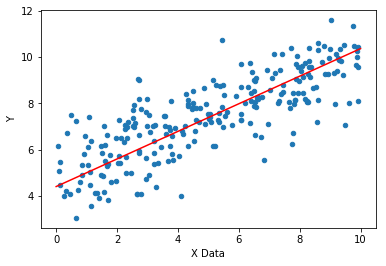

In [58]:
final_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(brand_new_data, predictions ,'r')